In [146]:
import pylab as plt
import numpy as np
import pandas as pd

# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import random
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import copy    

import scipy
from scipy import interpolate
from scipy.interpolate import interp2d, NearestNDInterpolator,LinearNDInterpolator

In [147]:
# f=open("Files/MCEqFluxMeshes_KM.pkl","rb") # Alpha bins
f=open("Files/MCEqFluxMeshes.pkl","rb") # cosalpha bins
EBins, cosas, gs, FluxMeshes= pickle.load(f)
f.close()

# f=open("../Proposal/Files/LinInterpsCosTheta.pkl","rb") # Proposal Interpolated Output
# f=open("../Proposal/Files/LinInterps.pkl","rb") # Proposal Interpolated Output -- Leslie
f=open("../Files/LinInterps.pkl","rb") # Proposal Interpolated Output
LinInterps=pickle.load(f)
f.close()

print(type(LinInterps))
print(len(EBins))

print(EBins)

display(LinInterps)

<class 'dict'>
13
[ 100  300  400  450  500  550  600  700  800 1000 2000 4000 6000]


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_63333/263925210.py:9: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  LinInterps=pickle.load(f)


{100: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187c19990>,
 300: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x186eeea40>,
 400: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187ae7b50>,
 450: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187c7f760>,
 500: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187c7da20>,
 550: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187c7ef50>,
 600: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187bb75b0>,
 650: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187d2a8f0>,
 700: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187d28460>,
 800: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187d28310>,
 900: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x18784b550>,
 1000: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187fa9810>,
 2000: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x187fab1f0>,
 4000: <scipy.interpolate.interpnd.LinearNDInterpolator at 0x1

In [148]:
# Getting Survival fractions for different MCeQ options
eps=0.01
survivalfractions=[]
correctedmeshes=[]



for ei in range(0,len(EBins)-2):
    mesh=copy.copy(FluxMeshes[ei])
    survmesh=np.zeros_like(mesh)
    for ica in range(len(cosas)):
        for ig in range(len(gs)):
            surv=LinInterps[EBins[ei]](cosas[ica]+eps,gs[ig])
            survmesh[ica,ig]=surv
            mesh[ica,ig]=mesh[ica,ig]*surv

    # Get rid of nan values
    survmesh = np.nan_to_num(survmesh)
    mesh = np.nan_to_num(mesh)

    correctedmeshes.append(mesh)
    survivalfractions.append(survmesh)
    

In [149]:
option = correctedmeshes
# option = survivalfractions

totalflux=np.zeros_like(option[0])
for m in option:
    totalflux+=m

# print(np.nanmax(totalflux.flatten()))
# print(cosas)
print(np.shape(totalflux))
print(totalflux)
print(max(totalflux.flatten()))

(50, 50)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.85832209e-08 6.12569062e-08 6.31619471e-08 ... 5.33275276e-08
  5.56917579e-08 5.85832209e-08]
 [6.19340323e-08 6.47759697e-08 6.62846215e-08 ... 5.97550924e-08
  6.02635252e-08 6.19340323e-08]
 [5.98176855e-08 6.18766839e-08 6.38804042e-08 ... 5.85837699e-08
  5.99470787e-08 6.15426993e-08]]
2.946764926274439e-07


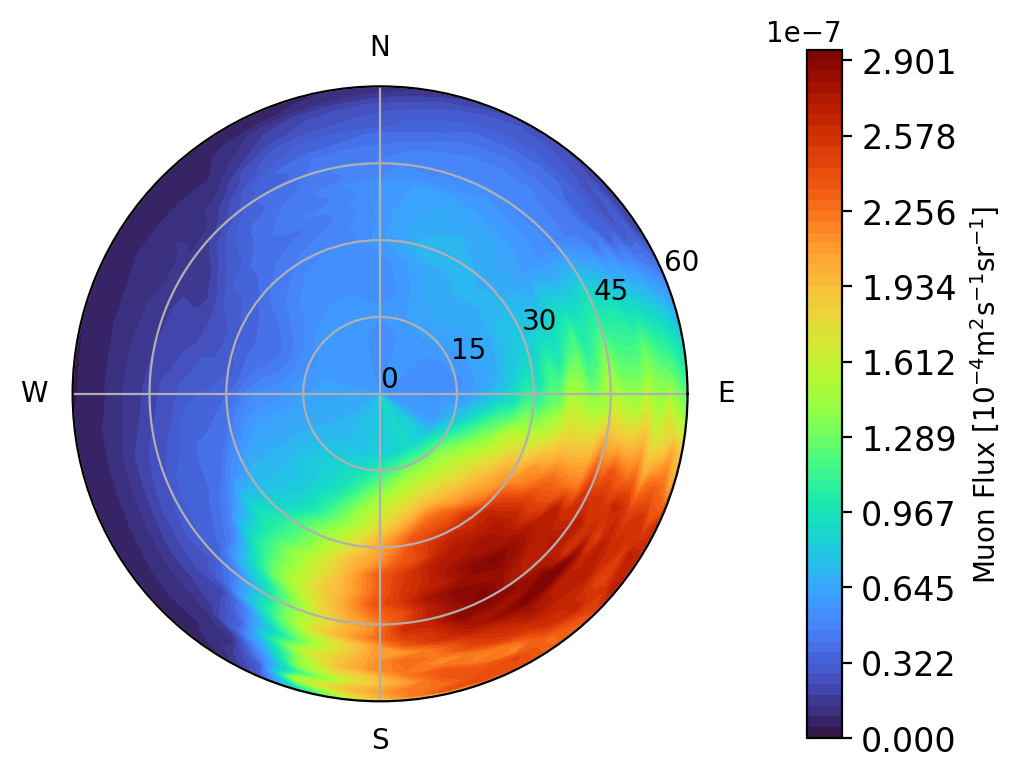

In [150]:
#This puts in same format as the muon flux measurement done directly with the paddles in Canfranc
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),constrained_layout=True,figsize=(5,5),dpi=200)
levels=np.linspace(0,np.nanmax(totalflux.flatten()),65)
im=ax.contourf(gs,np.arccos(cosas)*180/3.14, totalflux,cmap='turbo',levels=levels)
# im=ax.contourf(gs,cosas*180/3.14, totalflux,cmap='turbo',levels=levels)
ax.set_rlim(0,60)
ax.set_rticks([0,15,30,45,60])
#ax.tick_params(axis='both', colors='White')
# cb =plt.colorbar(im, shrink=0.7,ticks=np.arange(0,np.nanmax(totalflux.flatten()),5e-8))
cb =plt.colorbar(im, shrink=0.7)
#cb = fig.colorbar(im, shrink=0.7)

cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]")
cb.ax.tick_params(labelsize=12)
ax.set_thetagrids([0,90,180,270],['E','N','W','S'])
ax.set(facecolor = "lightgrey",alpha=0.2)
#plt.savefig("./PolarFluxes.png",dpi=250,bbox_inches='tight')
plt.show()